# **Resume Checker**

**Aim**

The aim of the project to Develope a Machine learning based Resume screaming system that can automatically analyze and Type of resume based on thier relevent to job a posting.

**Import Necesssory Libraries**

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set()

# Import text preprocessing libraries
import re
import string
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Import scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


**Load DataSet**

In [2]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")
df.shape

(962, 2)

**Show Top 5 Rows**

In [3]:
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


**Check Missing Values and Duplicated Values**

In [4]:
print("Missing Values --> " , df.isnull().sum())
print("duplicated Values --> " , df.duplicated().sum())

Missing Values -->  Category    0
Resume      0
dtype: int64
duplicated Values -->  796


# **Category**

In [5]:
df["Category"].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Blockchain,40
ETL Developer,40


# **Category**

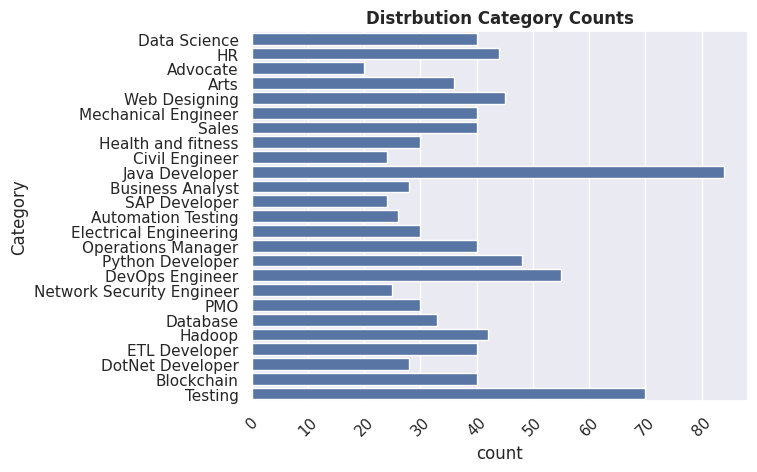

In [6]:
sns.countplot(y=df["Category"])
plt.xticks(rotation=45)
plt.title("Distrbution Category Counts",fontweight='bold')
plt.show()

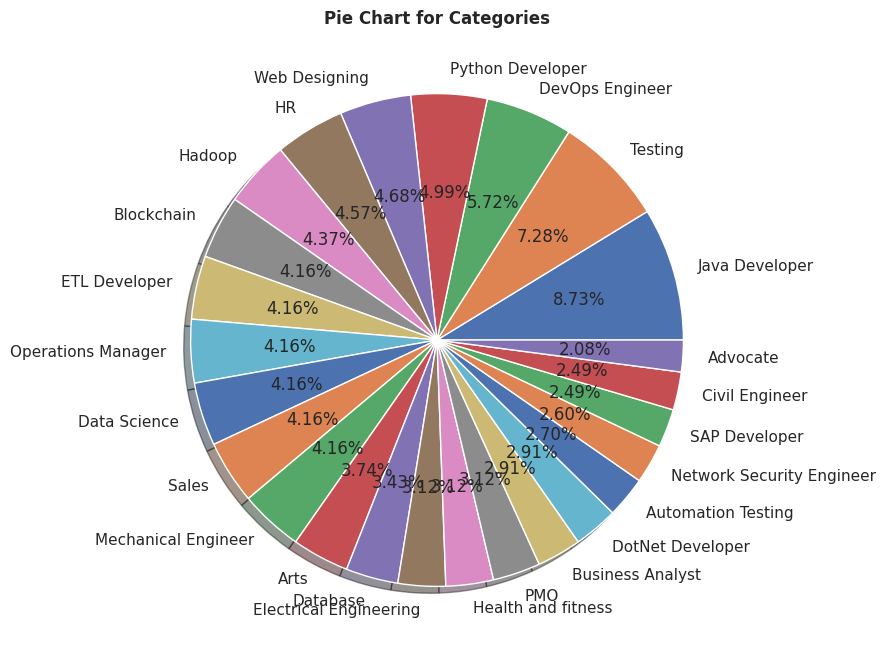

In [7]:
plt.figure(figsize=(8,8))
plt.pie(df["Category"].value_counts(),labels=df["Category"].value_counts().index,
       autopct="%0.02f%%", shadow =True)
plt.title("Pie Chart for Categories", fontweight='bold')
plt.show()

**Text Preprocessing for Resume Data:**
1. Cleaning
2. Tokenization
3. Stopword Removal
4. Stemming

In [9]:
# Load Spacy model
nlp = spacy.load("en_core_web_sm")

# Initialize stemmer
stemmer = PorterStemmer()

nltk.download('stopwords')

# Define the preprocessing function
def text_cleaning(text):
    # Step 1: Fix encoding issues
    # text = text.encode("utf-8", "ignore").decode("utf-8")

    # Step 2: Replace specific words
    text = text.replace("Naïve", "Naive")

    # Step 3: Clean text (URLs, special characters, hashtags, mentions, extra spaces)
    text = re.sub(r"http\S+", " ", text)  # Remove URLs
    text = re.sub(r"@\S+", " ", text)  # Remove mentions
    text = re.sub(r"#\S+", " ", text)  # Remove hashtags
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces

    # Step 4: Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

    # Step 5: Tokenize and lemmatize using Spacy
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stopwords.words("english")]

    # Step 6: Apply stemming
    tokens = [stemmer.stem(token) for token in tokens]


    # Join tokens back into a single string
    text = " ".join(tokens)
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text

# Apply the function to the "Resume" column
df["Resume"] = df["Resume"].apply(text_cleaning)

# Shuffle a Data
df = df.sample(962, random_state=42)

# Print the first row of the cleaned "Resume" column
print(df["Resume"].iloc[0])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


technic skill program languag java servlet jsp spring boot web technolog html5 css3 bootstrap javascript jqueri ajax angularj databas mysql ide tool eclips spring tool suit net bean sublim text atom oper system window xp 7 8 10 achiev â¢ java develop certif unanth technic institut â¢ java certif solo learn â¢ command line crash cours certif udemi job detail educ detail januari 2018 mca pune maharashtra pune univers januari 2015 bca amravati maharashtra amravati univers januari 2012 hsc amravati maharashtra amravati univers januari 2010 ssc amravati maharashtra amravati univers java develop full stack java develop skill detail css exprienc less 1 year month ajax exprienc less 1 year month servlet exprienc less 1 year month html5 exprienc less 1 year month spring exprienc less 1 year month java exprienc less 1 year month jqueri exprienc less 1 year month jsp exprienc less 1 year month javascript exprienc less 1 year month bootstrap exprienc less 1 year month spring boot exprienc less 

**Data Splitting for Model Training and Testing**

In [10]:
x_train,x_test,y_train,y_test = train_test_split(df["Resume"],df["Category"], test_size= 0.2, random_state=42)
print("x_train size -- >> " , x_train.shape)
print("y_train size -- >> " , y_train.shape)
print("x_test size -- >> " , x_test.shape)
print("y_test size -- >> " , y_test.shape)

x_train size -- >>  (769,)
y_train size -- >>  (769,)
x_test size -- >>  (193,)
y_test size -- >>  (193,)


**Label Encoding for Target Variables**

In [11]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

# **Text Vectorization**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with ngram_range for unigrams and bigrams
vector = CountVectorizer(ngram_range=(1, 1), max_features=5000)

# Fit and transform the training data
x_train = vector.fit_transform(x_train)

# Transform the test data using the learned vectorizer
x_test = vector.transform(x_test)

print("x_train size -- >> " , x_train.shape)
print("y_train size -- >> " , y_train.shape)
print("x_test size -- >> " , x_test.shape)
print("y_test size -- >> " , y_test.shape)

x_train size -- >>  (769, 5000)
y_train size -- >>  (769,)
x_test size -- >>  (193, 5000)
y_test size -- >>  (193,)


**Model Training and Evaluation: Performance Metrics, Classification Report, and Confusion Matrix**

In [13]:
def model_training_evaluation(model):

    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Calculate accuracy scores
    train_score = accuracy_score(y_train, train_pred)
    test_score = accuracy_score(y_test, test_pred)

    # Generate classification reports
    train_rep = classification_report(y_train, train_pred)
    test_rep = classification_report(y_test, test_pred)

    # Confusion matrix
    train_cm = confusion_matrix(y_train, train_pred)
    test_cm = confusion_matrix(y_test, test_pred)

    # Print results
    print("\n### Model Performance Evaluation ###\n")

    print("#### Train Data Performance ####")
    print(f"Train Accuracy Score: {train_score:.4f}")
    print(f"Train Classification Report:\n{train_rep}")
    print(f"Train Confusion Matrix:\n{train_cm}")

    print("\n#### Test Data Performance ####")
    print(f"Test Accuracy Score: {test_score:.4f}")
    print(f"Test Classification Report:\n{test_rep}")
    print(f"Test Confusion Matrix:\n{test_cm}")



**Model -- >> 1 -->> LogisticRegression**

In [14]:
from sklearn.linear_model import LogisticRegression  # Corrected spelling

# Fit the model
log_reg = OneVsRestClassifier(LogisticRegression(random_state=42))
model_training_evaluation(log_reg)


### Model Performance Evaluation ###

#### Train Data Performance ####
Train Accuracy Score: 1.0000
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        49
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        33
          14       1.00      1.00      1.00        22
     

**Model -- >> 1 -->> DecisionTreeClassifier**

In [15]:
from sklearn.tree import DecisionTreeClassifier

# Fit the model
model_dt = OneVsRestClassifier(DecisionTreeClassifier())
model_training_evaluation(model_dt)


### Model Performance Evaluation ###

#### Train Data Performance ####
Train Accuracy Score: 1.0000
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        35
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        35
           7       1.00      1.00      1.00        25
           8       1.00      1.00      1.00        49
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        25
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        33
          14       1.00      1.00      1.00        22
     

**Model -- >> 1 -->> KNeighborsClassifier**

In [16]:
from sklearn.neighbors import KNeighborsClassifier
model = OneVsRestClassifier(KNeighborsClassifier())
model_training_evaluation(model)


### Model Performance Evaluation ###

#### Train Data Performance ####
Train Accuracy Score: 0.9779
Train Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.54      0.70        13
           1       1.00      1.00      1.00        25
           2       0.94      0.75      0.83        20
           3       1.00      1.00      1.00        35
           4       1.00      0.94      0.97        18
           5       1.00      0.89      0.94        18
           6       0.97      1.00      0.99        35
           7       1.00      1.00      1.00        25
           8       1.00      0.94      0.97        49
           9       0.92      1.00      0.96        23
          10       1.00      1.00      1.00        31
          11       1.00      1.00      1.00        25
          12       0.86      1.00      0.93        32
          13       1.00      1.00      1.00        33
          14       1.00      1.00      1.00        22
     

# **Saved model**

In [17]:
import pickle

pickle.dump(vector,open("ngram.pkl",'wb'))
pickle.dump(log_reg,open("model.pkl",'wb'))
pickle.dump(encode,open("encoder.pkl",'wb'))

**Function to Predict Text Category Using Logistic Regression**

In [18]:
def pred(text):

    clean_text = text_cleaning(text)
    vectorize_text = vector.transform([clean_text])
    vectorize_text = vectorize_text.toarray()
    predicted = log_reg.predict(vectorize_text)
    predicted_value = encode.inverse_transform(predicted)

    return predicted_value[0]


**Test Model By doing Random Resume**

In [19]:
myresume = """I am a data scientist specializing in machine
learning, deep learning, and computer vision. With
a strong background in mathematics, statistics,
and programming, I am passionate about
uncovering hidden patterns and insights in data.
I have extensive experience in developing
predictive models, implementing deep learning
algorithms, and designing computer vision
systems. My technical skills include proficiency in
Python, Sklearn, TensorFlow, and PyTorch.
What sets me apart is my ability to effectively
communicate complex concepts to diverse
audiences. I excel in translating technical insights
into actionable recommendations that drive
informed decision-making.
If you're looking for a dedicated and versatile data
scientist to collaborate on impactful projects, I am
eager to contribute my expertise. Let's harness the
power of data together to unlock new possibilities
and shape a better future.
Contact & Sources
Email: 611noorsaeed@gmail.com
Phone: 03442826192
Github: https://github.com/611noorsaeed
Linkdin: https://www.linkedin.com/in/noor-saeed654a23263/
Blogs: https://medium.com/@611noorsaeed
Youtube: Artificial Intelligence
ABOUT ME
WORK EXPERIENCE
SKILLES
NOOR SAEED
LANGUAGES
English
Urdu
Hindi
I am a versatile data scientist with expertise in a wide
range of projects, including machine learning,
recommendation systems, deep learning, and computer
vision. Throughout my career, I have successfully
developed and deployed various machine learning models
to solve complex problems and drive data-driven
decision-making
Machine Learnine
Deep Learning
Computer Vision
Recommendation Systems
Data Visualization
Programming Languages (Python, SQL)
Data Preprocessing and Feature Engineering
Model Evaluation and Deployment
Statistical Analysis
Communication and Collaboration
"""

pred(myresume)

'Data Science'

In [20]:
myresume = """
Jane Smith is a certified personal trainer with over 5 years of experience in helping individuals achieve their fitness goals. Specializing in weight loss, strength training, and sports conditioning, Jane has developed personalized workout routines for clients of all ages and fitness levels. She has extensive knowledge in nutrition and exercise science, and uses this to create holistic health and fitness programs that are tailored to individual needs.

Jane holds a degree in Exercise Science and is a certified trainer through the National Academy of Sports Medicine (NASM). She has worked with athletes, seniors, and individuals with chronic health conditions, helping them improve their physical well-being and overall quality of life.

Her expertise includes:
- Weight Loss and Body Composition
- Strength Training and Resistance Exercises
- Cardio Conditioning
- Nutrition Coaching and Meal Planning
- Injury Prevention and Rehabilitation
- Functional Movement and Flexibility Training
- Group Fitness Classes

Certifications:
- Certified Personal Trainer, NASM
- CPR and First Aid Certified
- Yoga Instructor (200-Hour Certification)

Education:
BSc in Exercise Science, ABC University, 2014-2018

Work Experience:
- Personal Trainer at XYZ Fitness Gym (2018-Present)
- Fitness Coach at Wellness Center (2016-2018)

Languages:
- English (Fluent)
- Spanish (Conversational)
"""

# Now, test the model with the Health and Fitness-focused resume
pred(myresume)

'Health and fitness'

In [21]:
myresume = """
John Doe is an experienced Network Security Engineer with over 7 years of expertise in designing, implementing, and managing network security infrastructures. Specializing in safeguarding critical network systems, John has worked with various organizations to protect against cyber threats, data breaches, and unauthorized access. He is proficient in deploying firewalls, intrusion detection systems (IDS), VPNs, and network monitoring tools to ensure the integrity and security of networks.

John holds a degree in Computer Science and certifications in several cybersecurity domains, including Certified Information Systems Security Professional (CISSP), Certified Ethical Hacker (CEH), and Cisco Certified Network Associate (CCNA). He has extensive experience in troubleshooting and resolving network vulnerabilities, and has played a key role in conducting security audits and risk assessments.

Key Skills:
- Network Security Architecture
- Firewall Management and Configuration
- Intrusion Detection and Prevention Systems (IDS/IPS)
- Virtual Private Networks (VPNs)
- Security Audits and Risk Assessments
- Cybersecurity Incident Response
- Network Monitoring and Traffic Analysis
- Vulnerability Assessment and Penetration Testing
- Data Encryption and Secure Communications

Certifications:
- CISSP (Certified Information Systems Security Professional)
- CEH (Certified Ethical Hacker)
- CCNA (Cisco Certified Network Associate)
- CompTIA Security+

Education:
BSc in Computer Science, XYZ University, 2012-2016

Professional Experience:
- Network Security Engineer at ABC Corp (2016-Present)
- IT Security Specialist at DEF Solutions (2014-2016)

Languages:
- English (Fluent)
- French (Intermediate)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

'Network Security Engineer'

In [22]:
myresume = """
Profile
 Aspiring Data Scientist with a Bachelor’s degree in Information Technology and a strong passion for
 AI, data analysis, and machine learning. Proficient in building data-driven solutions to real-world
 problems, with hands-on experience in predictive modeling, exploratory data analysis (EDA), and
 feature engineering. I am eager to contribute my skills and continually grow in the field of data
 science.
-  EDUCATION
 Bachelor of Science in Information Technology
 Government College University Faisalabad(GCUF)
 Intermediate of Computer Science
 Gabriel College
 SKILLS
 (2020-2024)
 Pakistan
 (2018-2020)
 Mandi Bahauddin
 ● Python
 ● Machine Learning
 ● DataScience
 ● Exploratory Data Analysis (EDA)
 ● HTML,CSS
 ● Flask
 Projects
 Student Performance Indicator
 ● This project aims to predict student performance based on various features such as gender,
 race/ethnicity, parental education level, lunch type, and scores in reading and writing.
 ● Theanalysis and prediction model provide insights into factors affecting students' math scores.
 Flight Fare Prediction
 ● Built a predictive model using the Random Forest Regressor to estimate airline ticket prices.
 ● Implemented data preprocessing, feature engineering, and thorough analysis.
 ● Achieved high model accuracy by optimizing hyperparameters.
 Car Price Prediction
 ● Developed a machine learning model to predict car prices using Python, Pandas, and
 Scikit-learn.
 ● Conducted data cleaning, feature engineering , and exploratory data analysis to optimize
 model performance.
 Laptop Price Prediction
 ● Ideveloped a machine learning model to predict car prices.
 ● Theproject involved extensive data preprocessing, handling missing values and outliers, and
 implementing regression algorithms to improve prediction accuracy.
 Movie Recommendation System
 ● Developed a movie recommendation system using collaborative filtering and content-based
 filtering techniques to provide personalized movie suggestions.
 ● Employed cosine similarity to recommend movies with similar features for content-based
 filtering.
 Certificate
 ● DataAnalyst Course From WsCube
 ● TheMachine Learning Process A-Z From (365 DataScience)
 ● Introduction to Data and Data Science From (365 DataScience)
 ● Machine Learning in Python From (365 DataScience)
"""

# Now, test the model with the Network Security Engineer-focused resume
pred(myresume)

'Data Science'